<a href="https://colab.research.google.com/github/chetan7116desai/TEAM_A_data606/blob/main/Data_Merging/1_Read_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Vaccine Efficiency Prediction using machine learning techniques bold text**


>***Combine Data from 1990 to 2022***

  This file contains the code to combine all the vaccine, symptoms and data files from 1990 to 2022 to single file.
   

1. df_vax contains all the combined csv files of vaccinations from the year 1990 to 2022
2. df_symp contains all the combined csv files of symptoms from the year 1990 to 2022
3. df_data contains all the combined csv files of data from the year 1990 to 2022






>***Understanding VAERS data***



1.   VAERS was formed by the FDA and the CDC to gather reports of vaccine-related adverse events. (From November 1, 1990 to the present)
2.   VAERS is used to continuously monitor reports to see if any vaccination or vaccine lot has a greater rate of incidents than expected
3. Approximately 85-90 percent of vaccination adverse event reports are for very modest occurrences like fevers or redness and edema at the injection site. The remaining reports (less than 15%) are about serious incidents including hospitalizations, life-threatening diseases, or fatalities
4. When multiple reports of a silgle case or event are received, only the first report received is included in the publicly acessible dataset

---







> ***Description of Data Files***


Data sets files can be downloaded from [here](https://vaers.hhs.gov/data/datasets.html)

Data Discription can be found [here](https://vaers.hhs.gov/docs/VAERSDataUseGuide_November2020.pdf)

> ***There are three data files:***

VAERSDATA.CSV

VAERSVAX.CSV

VAERSSYMPTOMS.CSV

There are three data types:

NUM = numeric data

CHAR = text or "character" data

DATE = date fields in mm/dd/yy format





> ***VAERS Data Limitations***



When analyzing VAERS data, keep in mind that no cause-and-effect relationship has been proven for any reported occurrence. VAERS receives reports of all possible links between vaccines and adverse events (possible side effects). As a result, VAERS collects information on any adverse event that occurs after immunization, whether it is coincidental or actually caused by the vaccine. A report of an adverse event to VAERS is not proof that the occurrence was caused by the vaccine.

* VAERS is a passive reporting system, which means that reports of adverse events are not collected automatically and must be reported to VAERS. Anyone, including healthcare providers, patients, and family members, can voluntarily submit VAERS reports. The quality and completeness of reports varies. They frequently lack details and, on sometimes, may provide inaccurate information.

* One of the major drawbacks of passive monitoring systems, such as VAERS, is "underreporting." The phrase "underreporting" refers to the reality that only a tiny percentage of genuine adverse events are reported to VAERS. The extent of underreporting differs greatly. For example, many of the millions of immunizations given by injection each year induce pain, yet only a small percentage of these instances result in a VAERS report. Minor side effects of vaccines often include this type of soreness, as well as low fevers, as physicians and patients are aware. Serious and unexpected medical events, on the other hand, are more likely to be reported than minor ones, especially when they occur soon after immunization, even if they are unrelated to the vaccine.

* A report to VAERS does not always imply that the indicated vaccine(s) were to blame for the adverse event. It merely validates that the alleged occurrence happened after the vaccine was administered. VAERS will accept the report without requiring confirmation that the occurrence was caused by the immunization. VAERS accepts all reports without determining if the vaccine was to blame.

## Importing Libraries

In [ ]:
# Connecting to shared drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings(action='ignore')
import re
import numpy as np

## Data Reading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS"

/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS


In [ ]:
ls "/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS"

1990VAERSDATA.csv      2002VAERSDATA.csv      2014VAERSDATA.csv
1990VAERSSYMPTOMS.csv  2002VAERSSYMPTOMS.csv  2014VAERSSYMPTOMS.csv
1990VAERSVAX.csv       2002VAERSVAX.csv       2014VAERSVAX.csv
1991VAERSDATA.csv      2003VAERSDATA.csv      2015VAERSDATA.csv
1991VAERSSYMPTOMS.csv  2003VAERSSYMPTOMS.csv  2015VAERSSYMPTOMS.csv
1991VAERSVAX.csv       2003VAERSVAX.csv       2015VAERSVAX.csv
1992VAERSDATA.csv      2004VAERSDATA.csv      2016VAERSDATA.csv
1992VAERSSYMPTOMS.csv  2004VAERSSYMPTOMS.csv  2016VAERSSYMPTOMS.csv
1992VAERSVAX.csv       2004VAERSVAX.csv       2016VAERSVAX.csv
1993VAERSDATA.csv      2005VAERSDATA.csv      2017VAERSDATA.csv
1993VAERSSYMPTOMS.csv  2005VAERSSYMPTOMS.csv  2017VAERSSYMPTOMS.csv
1993VAERSVAX.csv       2005VAERSVAX.csv       2017VAERSVAX.csv
1994VAERSDATA.csv      2006VAERSDATA.csv      2018VAERSDATA.csv
1994VAERSSYMPTOMS.csv  2006VAERSSYMPTOMS.csv  2018VAERSSYMPTOMS.csv
1994VAERSVAX.csv       2006VAERSVAX.csv       2018VAERSVAX.csv
1995VAERSDATA.csv      20

In [ ]:
import pandas as pd
import glob

### Reading Vaccine files

In [ ]:
glob.glob("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/*VAERSVAX.csv")

['/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1991VAERSVAX.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1990VAERSVAX.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1994VAERSVAX.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1992VAERSVAX.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1993VAERSVAX.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1996VAERSVAX.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1995VAERSVAX.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1997VAERSVAX.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/2000VAERSVAX.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS

In [ ]:
all_data_vax = []
for f in glob.glob("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/*VAERSVAX.csv"):
    VAX = pd.read_csv(f,encoding='latin1', engine='python')
    all_data_vax.append(VAX)
df_vax = pd.concat(all_data_vax, axis=0, ignore_index=True)

In [ ]:
df_vax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420759 entries, 0 to 2420758
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   VAERS_ID         int64 
 1   VAX_TYPE         object
 2   VAX_MANU         object
 3   VAX_LOT          object
 4   VAX_DOSE_SERIES  object
 5   VAX_ROUTE        object
 6   VAX_SITE         object
 7   VAX_NAME         object
dtypes: int64(1), object(7)
memory usage: 147.8+ MB


In [ ]:
# Writing combined files into one file
df_vax.to_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_vax.csv")

### Reading Symptoms files

In [ ]:
glob.glob("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/*VAERSSYMPTOMS.csv")

['/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1990VAERSSYMPTOMS.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1991VAERSSYMPTOMS.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1993VAERSSYMPTOMS.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1994VAERSSYMPTOMS.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1992VAERSSYMPTOMS.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1996VAERSSYMPTOMS.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1995VAERSSYMPTOMS.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1997VAERSSYMPTOMS.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1999VAERSSYMPTOMS.csv',
 '/content/drive/Shareddrives/Team A 

In [ ]:
all_data_symptoms = []
for f in glob.glob("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/*VAERSSYMPTOMS.csv"):
    SYMP = pd.read_csv(f,encoding='latin1', engine='python')
    all_data_symptoms.append(SYMP)
df_symp = pd.concat(all_data_symptoms, axis=0, ignore_index=True)

In [ ]:
df_symp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596826 entries, 0 to 2596825
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   VAERS_ID         int64  
 1   SYMPTOM1         object 
 2   SYMPTOMVERSION1  float64
 3   SYMPTOM2         object 
 4   SYMPTOMVERSION2  float64
 5   SYMPTOM3         object 
 6   SYMPTOMVERSION3  float64
 7   SYMPTOM4         object 
 8   SYMPTOMVERSION4  float64
 9   SYMPTOM5         object 
 10  SYMPTOMVERSION5  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 217.9+ MB


In [ ]:
# Writing combined files into one file
df_symp.to_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_sym.csv")

### Reading Data Files

In [ ]:
glob.glob("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/*VAERSDATA.csv")

['/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1991VAERSDATA.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1990VAERSDATA.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1993VAERSDATA.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1992VAERSDATA.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1994VAERSDATA.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1995VAERSDATA.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1996VAERSDATA.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/1997VAERSDATA.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/2000VAERSDATA.csv',
 '/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAER

In [ ]:
all_data_DATA = []
for f in glob.glob("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/AllVAERSDataCSVS/*VAERSDATA.csv"):
    DATA = pd.read_csv(f,encoding='latin1', engine='python')
    all_data_DATA.append(DATA)
df_data = pd.concat(all_data_DATA, axis=0, ignore_index=True)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951645 entries, 0 to 1951644
Data columns (total 35 columns):
 #   Column        Dtype  
---  ------        -----  
 0   VAERS_ID      int64  
 1   RECVDATE      object 
 2   STATE         object 
 3   AGE_YRS       float64
 4   CAGE_YR       float64
 5   CAGE_MO       float64
 6   SEX           object 
 7   RPT_DATE      object 
 8   SYMPTOM_TEXT  object 
 9   DIED          object 
 10  DATEDIED      object 
 11  L_THREAT      object 
 12  ER_VISIT      object 
 13  HOSPITAL      object 
 14  HOSPDAYS      float64
 15  X_STAY        object 
 16  DISABLE       object 
 17  RECOVD        object 
 18  VAX_DATE      object 
 19  ONSET_DATE    object 
 20  NUMDAYS       float64
 21  LAB_DATA      object 
 22  V_ADMINBY     object 
 23  V_FUNDBY      object 
 24  OTHER_MEDS    object 
 25  CUR_ILL       object 
 26  HISTORY       object 
 27  PRIOR_VAX     object 
 28  SPLTTYPE      object 
 29  FORM_VERS     int64  
 30  TODAYS_DATE   obje

In [ ]:
# Writing combined files into one file
df_data.to_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_pat.csv")

## Understanding the distributions of vaccines

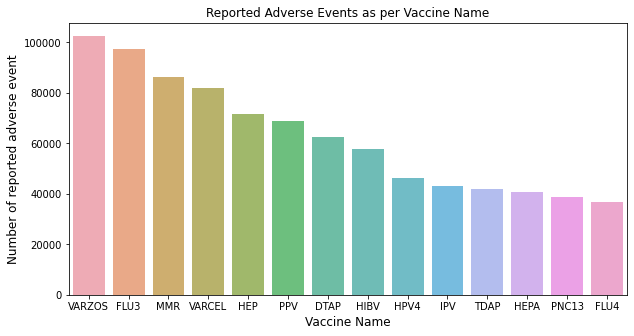

In [ ]:

vax_type  = df_vax['VAX_TYPE'].value_counts().sort_values(ascending=False)[1:15]
vax_type = pd.DataFrame(vax_type)
plt.figure(figsize=(10,5))
sns.barplot(x=vax_type.index, y=vax_type.VAX_TYPE, data=vax_type, alpha=0.8)
plt.title('Reported Adverse Events as per Vaccine Name')
plt.ylabel('Number of reported adverse event', fontsize=12)
plt.xlabel('Vaccine Name', fontsize=12)
plt.show()

### Data Exploration 

In [ ]:
print(df_data["VAERS_ID"].nunique())
print(df_symp["VAERS_ID"].nunique())
print(df_vax["VAERS_ID"].nunique())

1951645
1951386
1951644


In [ ]:
print(df_data.shape)
print(df_symp.shape)
print(df_vax.shape)

(1951645, 35)
(2596826, 11)
(2420759, 8)


In [ ]:
df_vax.head()


,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,27274,HIBV,PFIZER\WYETH,M030FC,1,IM,NaN,HIB (HIBTITER)
1,27275,FLU3,PARKE-DAVIS,01870P,UNK,IM,LA,INFLUENZA (SEASONAL) (FLUOGEN)
2,27276,DTP,LEDERLE LABORATORIES,0B21173,3,IM L,NaN,DTP (TRI-IMMUNOL)
3,27276,OPV,PFIZER\WYETH,NaN,3,PO,MO,"POLIO VIRUS, ORAL (ORIMUNE)"
4,27277,RAB,PASTEUR MERIEUX INST.,D1186,2,NaN,LA,RABIES (IMOVAX ID)


In [ ]:
df_symp.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,25001,Agitation,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25003,Delirium,8.1,Hypokinesia,8.1,Hypotonia,8.1,NaN,NaN,NaN,NaN
2,25004,Chills,8.1,Dermatitis contact,8.1,Oedema genital,8.1,Pelvic pain,8.1,NaN,NaN
3,25005,Arthritis,8.1,Injection site oedema,8.1,Injection site reaction,8.1,NaN,NaN,NaN,NaN
4,25006,Convulsion,8.1,Dizziness,8.1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_data.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,27274,01/02/1991,CA,1.5,NaN,NaN,F,NaN,Pt vaccinated with HIB titer developed meningi...,NaN,...,Had URI at time of injection,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1,27275,01/02/1991,MN,82.0,82.0,NaN,M,12/26/1990,Pt vaccinated with FLUOGEN apparent cardiac ar...,Y,...,NaN,"No allergies, murmur, parkinson's dsiease, art...",~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN
2,27276,01/02/1991,GA,0.6,0.0,0.6,F,12/14/1990,Pt vaccinated with DTP/OPV developed fever 105...,NaN,...,mild otitis media,otitis media,~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN
3,27277,01/02/1991,NY,37.0,37.0,NaN,F,12/05/1990,"Pt vacc. w/ Rabies developed backache, very pa...",NaN,...,NaN,NaN,~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN
4,27278,01/02/1991,ME,57.0,57.0,NaN,M,12/20/1990,Pt vaccinated with Pneumococcal/FLU ZONE devel...,NaN,...,Emphysema no acute,emphysema/Rt shoulder injury/smoker,~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN


## Reference
1. Reference:https://pbpython.com/excel-file-combine.html